In [10]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,mean_squared_percentage_error,median_absolute_percentage_error
import pandas as pd
from sktime.utils.plotting import plot_series
import sys
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.forecasting.arima import AutoARIMA, ARIMA
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import matplotlib.pyplot as plt
import numpy as np

In [66]:
csv = pd.read_csv('Datasets/delhi_Data.csv',parse_dates=[0], index_col=0)

d = pd.DataFrame(csv)
d

,pm2.5,pm10,o3,no2,so2,co
2024-03-06,136.0,82.0,6.0,11.0,2.0,8.0
2024-03-05,124.0,109.0,10.0,12.0,2.0,10.0
2024-03-04,125.0,104.0,10.0,11.0,3.0,10.0
2024-03-03,102.0,125.0,10.0,9.0,2.0,10.0
2024-03-02,181.0,87.0,6.0,8.0,1.0,9.0
...,...,...,...,...,...,...
2018-01-28,313.0,250.0,5.0,12.0,1.0,11.0
2018-01-27,268.0,330.0,6.0,13.0,2.0,13.0
2018-01-26,260.0,182.0,4.0,9.0,1.0,6.0
2018-01-25,274.0,207.0,2.0,17.0,2.0,8.0


<Axes: >

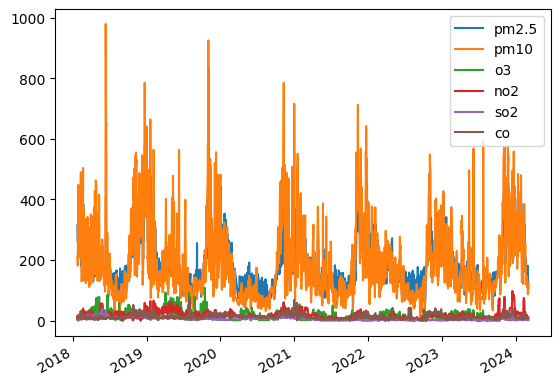

In [3]:
d.plot()

<Axes: >

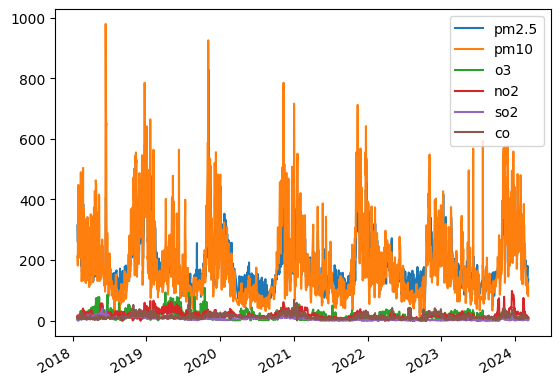

In [67]:
d.plot()

<Axes: >

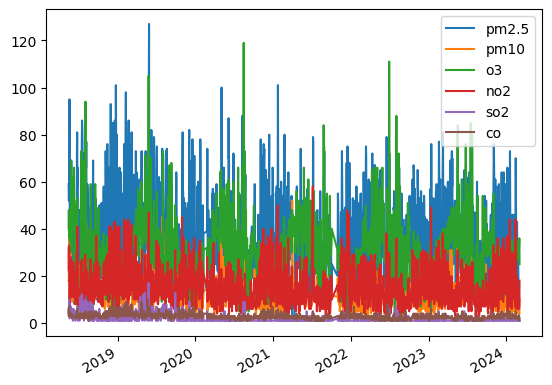

In [4]:
d.plot()

In [8]:
forecast_df = d1.resample(rule='D').sum()    
forecast_df = forecast_df.interpolate(method="time")

df = forecast_df['pm2.5']

mean_value = df.mean()

# Replace zeros with mean value
df = df.replace(0, mean_value)

y_train = df[:-30]
y_test = df.tail(30)

# y_train, y_test = temporal_train_test_split(df, train_size=0.8)

In [97]:
forecast_df.tail(30)

,pm2.5,pm10,o3,no2,so2,co
2024-02-06,177.0,143.0,12.0,13.0,6.0,6.0
2024-02-07,161.0,146.0,6.0,15.0,2.0,5.0
2024-02-08,163.0,121.0,15.0,19.0,1.0,5.0
2024-02-09,160.0,258.0,9.0,59.0,4.0,25.0
2024-02-10,175.0,352.0,20.0,72.0,4.0,10.0
2024-02-11,284.0,231.0,10.0,75.0,4.0,9.0
2024-02-12,254.0,223.0,16.0,71.0,4.0,7.0
2024-02-13,238.0,385.0,14.0,67.0,5.0,12.0
2024-02-14,316.0,248.0,19.0,47.0,4.0,7.0
2024-02-15,263.0,222.0,20.0,27.0,4.0,9.0


In [69]:
forecast_df

,pm2.5,pm10,o3,no2,so2,co
2018-01-24,314.0,212.0,4.0,13.0,4.0,9.0
2018-01-25,274.0,207.0,2.0,17.0,2.0,8.0
2018-01-26,260.0,182.0,4.0,9.0,1.0,6.0
2018-01-27,268.0,330.0,6.0,13.0,2.0,13.0
2018-01-28,313.0,250.0,5.0,12.0,1.0,11.0
...,...,...,...,...,...,...
2024-03-02,181.0,87.0,6.0,8.0,1.0,9.0
2024-03-03,102.0,125.0,10.0,9.0,2.0,10.0
2024-03-04,125.0,104.0,10.0,11.0,3.0,10.0
2024-03-05,124.0,109.0,10.0,12.0,2.0,10.0


In [52]:
# y_test_series = pd.Series(y_test['pm2.5'])
# y_test_series.index = pd.to_datetime(y_test_series.index).to_period('D')

In [58]:
# y_train_series = pd.Series(y_train['pm2.5'])
# y_train_series.index = pd.to_datetime(y_train_series.index).to_period('D')

C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


-------------------------------------------
Forecaster: ExponentialSmoothing(seasonal='mul', sp=12, trend='mul')
Mean Absolute Error: 50.76622050912709
Mean Absolute Percentage Error: 0.2681904421879523
Mean Squared Error: 3139.0733301366067
Root Mean Squared Error:  56.02743372792124
Mean Squared Percentage Error: 0.15627370858401804
Median Absolute Percentage Error: 0.2681904421879523
R2 error: -0.4758057802860367
Accuracy based on Mean Absolute Percentage Error of the model: 99.73
-------------------------------------------


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='pm2.5'>)

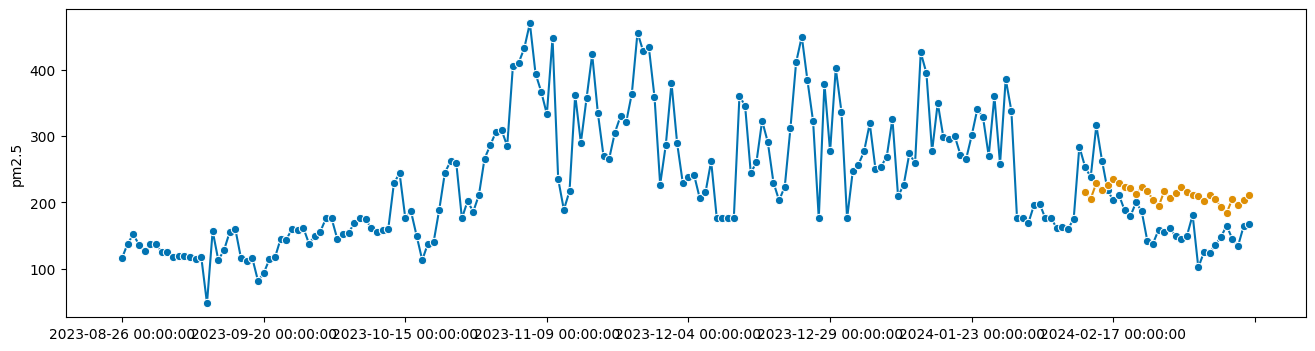

In [11]:
fh = ForecastingHorizon(y_test.index, is_relative=False)

# forecaster = ThetaForecaster(sp=12)
# forecaster = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# forecaster = AutoARIMA(sp=1, suppress_warnings=True)
# forecaster = NaiveForecaster(strategy="last")
#sp means seasonal period
forecaster = ExponentialSmoothing(trend='mul', seasonal='mul', sp=12)  
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
# ci = forecaster.predict_interval(fh, coverage=0.9).astype("float")
y_true = df.tail(30)

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mspe = mean_squared_percentage_error(y_true, y_pred)    
mape = median_absolute_percentage_error(y_true, y_pred)
r2_score_ = r2_score(y_true, y_pred)


print("-------------------------------------------")
print('Forecaster:', forecaster)
print('Mean Absolute Error:', mae)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error: ', rmse)
print('Mean Squared Percentage Error:', mspe)
print('Median Absolute Percentage Error:', mape)
print('R2 error:', r2_score_)
print(f'Accuracy based on Mean Absolute Percentage Error of the model: {(100 - mape):.2f}')
print("-------------------------------------------")


plot_series(df.tail(200), y_pred)

In [53]:
threshold = 0.1 * (y_true.max() - y_true.min())
accurate_predictions = np.abs(y_true - y_pred) < threshold
accuracy_percentage = accurate_predictions.mean() * 100
print(f"Accuracy (based on threshold): {accuracy_percentage:.2f}%")


Accuracy (based on threshold): 20.00%


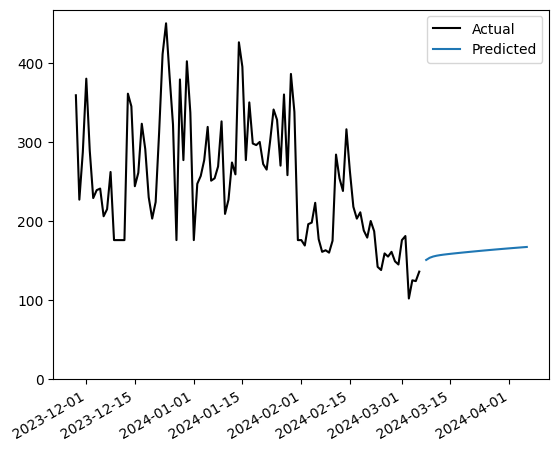

In [95]:
# Visualize results
plt.plot(
    df.tail(100),
    label="Actual",
    color="black",
)
# plt.gca().fill_between(
#     ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1
# )
# plt.imshow(y_pred, cmap='hot', interpolation='nearest')
plt.plot(y_pred, label="Predicted")
plt.xticks(rotation=30, ha='right')
# plt.title(
#     f"{horizon} day forecast for {col} (mae: {round(mae, 2)}, confidence: {confidence*100}%)"
# )
plt.ylim(bottom=0)
plt.legend()
plt.grid(False)
plt.show()

In [35]:
y_true, y_pred

(2024-02-04    198.000000
 2024-02-05    175.929659
 2024-02-06    177.000000
 2024-02-07    161.000000
 2024-02-08    163.000000
 2024-02-09    160.000000
 2024-02-10    175.000000
 2024-02-11    284.000000
 2024-02-12    254.000000
 2024-02-13    238.000000
 2024-02-14    316.000000
 2024-02-15    263.000000
 2024-02-16    218.000000
 2024-02-17    203.000000
 2024-02-18    211.000000
 2024-02-19    188.000000
 2024-02-20    179.000000
 2024-02-21    200.000000
 2024-02-22    187.000000
 2024-02-23    142.000000
 2024-02-24    138.000000
 2024-02-25    159.000000
 2024-02-26    155.000000
 2024-02-27    161.000000
 2024-02-28    149.000000
 2024-02-29    145.000000
 2024-03-01    175.929659
 2024-03-02    181.000000
 2024-03-03    102.000000
 2024-03-04    125.000000
 Freq: D, Name: pm2.5, dtype: float64,
 2024-03-07    178.634252
 2024-03-08    180.880418
 2024-03-09    178.621816
 2024-03-10    175.063739
 2024-03-11    176.288216
 2024-03-12    178.081331
 2024-03-13    178.300815

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='pm2.5'>)

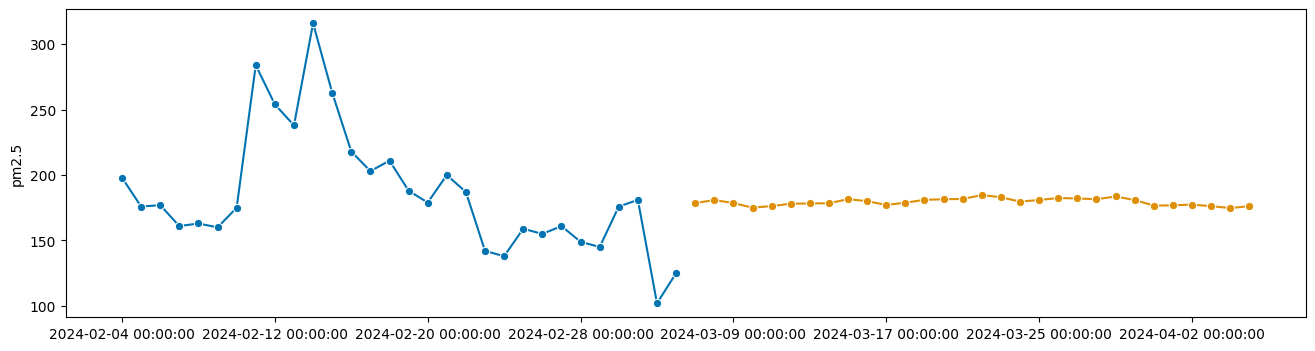

In [34]:
plot_series(df.tail(30), y_pred)

C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='pm2.5'>)

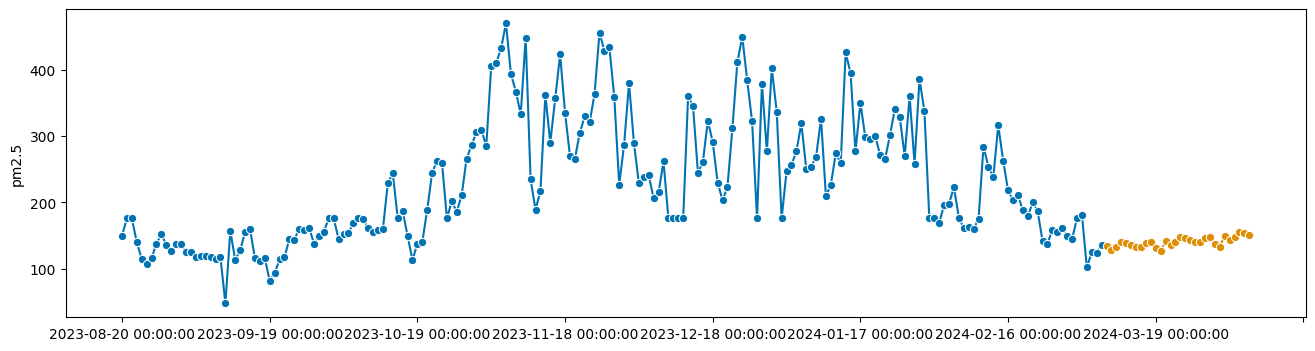

In [101]:
from datetime import datetime, timedelta

#for present date            
present_date = datetime.now().date()
#to start predictions from tomorrow
present_date = str(present_date + timedelta(days=1)).split(' ')[0]

fh = ForecastingHorizon(
pd.date_range(str(present_date), periods=30, freq='D'),is_relative=False)
# forecaster = ThetaForecaster(sp=12)
# forecaster = Prophet(yearly_seasonality=True, weekly_seasonality=True)
# forecaster = AutoARIMA(sp=1, suppress_warnings=True)
# forecaster = NaiveForecaster(strategy="last")
forecaster = ExponentialSmoothing(trend='multiplicative', seasonal='multiplicative', sp=12)

forecaster.fit(df)

y_pred = forecaster.predict(fh)

plot_series(df.tail(200), y_pred)


In [103]:
fh

ForecastingHorizon(['2024-03-09', '2024-03-10', '2024-03-11', '2024-03-12',
               '2024-03-13', '2024-03-14', '2024-03-15', '2024-03-16',
               '2024-03-17', '2024-03-18', '2024-03-19', '2024-03-20',
               '2024-03-21', '2024-03-22', '2024-03-23', '2024-03-24',
               '2024-03-25', '2024-03-26', '2024-03-27', '2024-03-28',
               '2024-03-29', '2024-03-30', '2024-03-31', '2024-04-01',
               '2024-04-02', '2024-04-03', '2024-04-04', '2024-04-05',
               '2024-04-06', '2024-04-07'],
              dtype='datetime64[ns]', freq='D', is_relative=False)

In [54]:
#using XGBoost algorithm
# from sktime.performance_metrics.forecasting import smape_loss
from xgboost import XGBRegressor

# Load example data
# y = load_airline()

# Split data into train and test
y_train, y_test = temporal_train_test_split(df)

# Train XGBoost model
model = XGBRegressor()
model.fit(y_train.index.values.reshape(-1, 1), y_train)

# Make predictions
y_pred = model.predict(y_test.index.values.reshape(-1, 1))

y_pred
# Evaluate predictions
# loss = smape_loss(y_test, y_pred)
# print("SMAPE Loss:", loss)

XGBoostError: [18:32:27] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\data\array_interface.h:135: Check failed: typestr.size() == 3 || typestr.size() == 4: `typestr' should be of format <endian><type><size of type in bytes>.

In [21]:

count = 0
for i in df:
    if int(i) == 0:
        count += 1
count

0

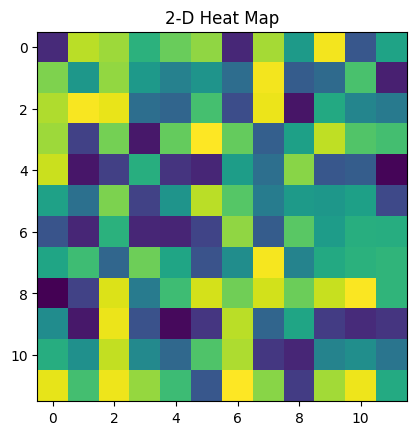

In [9]:
# # Program to plot 2-D Heat map
# # using matplotlib.pyplot.imshow() method
# import numpy as np
# import matplotlib.pyplot as plt

data = np.random.random(( 12 , 12 ))
# plt.imshow( (y_pred_1, y_pred_2, y_pred_3) )
plt.imshow(data)

plt.title( "2-D Heat Map" )
plt.show()


In [38]:
data

array([[0.86094726, 0.01796231, 0.21779708, 0.47346607, 0.26522428,
        0.74918295, 0.32195925, 0.97692752, 0.66672142, 0.19129476,
        0.15483441, 0.42206305],
       [0.33572578, 0.87214688, 0.82638292, 0.82482775, 0.49194311,
        0.95119644, 0.4812441 , 0.53196363, 0.16049871, 0.84323186,
        0.8501866 , 0.13388177],
       [0.45831575, 0.14362869, 0.84392538, 0.84240305, 0.55904545,
        0.72516229, 0.07283058, 0.28500265, 0.43054374, 0.02950116,
        0.45050788, 0.12456863],
       [0.46408747, 0.78393715, 0.51247917, 0.54398232, 0.71917823,
        0.64538708, 0.13025744, 0.63101295, 0.43837112, 0.59777383,
        0.84232253, 0.05331027],
       [0.1236381 , 0.18516008, 0.26124549, 0.44358154, 0.39300545,
        0.54671315, 0.32601785, 0.933428  , 0.42273137, 0.35168749,
        0.77268321, 0.61003594],
       [0.88650172, 0.88296269, 0.59977853, 0.1314638 , 0.10855794,
        0.19136959, 0.99048349, 0.76731114, 0.45479438, 0.01836484,
        0.15754162,

In [43]:
# importing necessary libraries
from sktime.datasets import load_longley
from sktime.forecasting.neuralforecast import NeuralForecastLSTM
from sktime.split import temporal_train_test_split
# loading the Longley dataset and splitting it into train and test subsets
y, X = load_longley()
y_train, y_test, X_train, X_test = temporal_train_test_split(y, X, test_size=4)
# creating model instance configuring the hyperparameters
model = NeuralForecastLSTM(  
    "A-DEC", futr_exog_list=["ARMED", "POP"], max_steps=5
)
# fitting the model
model.fit(y_train, X=X_train, fh=[1, 2, 3, 4])  
# getting point predictions
model.predict(X=X_test)  

ModuleNotFoundError: No module named 'sktime.forecasting.neuralforecast'

In [44]:
pip install sktime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: C:\Users\vivek\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [47]:
import numpy as np
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import ReducedRegressionForecaster
from sktime.forecasting.model_selection import ForecastingGridSearchCV
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.base import ForecastingHorizon
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sktime.performance_metrics.forecasting import smape_loss
from sktime.performance_metrics.forecasting import mape_loss
from sktime.performance_metrics.forecasting import mase_loss
import warnings

warnings.filterwarnings("ignore")

# Load example data (monthly airline passengers dataset)
y = load_airline()

# Split the data into training and testing sets
y_train, y_test = temporal_train_test_split(y, test_size=36)

# Function to create time series data for LSTM
def create_lagged_features(y, window_size):
    n = len(y)
    X = np.zeros((n - window_size, window_size))
    for i in range(window_size):
        X[:, i] = y[i:n - window_size + i]
    return X

# Transform data for LSTM
window_size = 12
X_train = create_lagged_features(y_train, window_size)
X_test = create_lagged_features(y_test, window_size)
y_train = y_train[window_size:]
y_test = y_test[window_size:]

# Reshape data for LSTM
X_train = X_train.reshape(-1, window_size, 1)
X_test = X_test.reshape(-1, window_size, 1)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

# Predict using the fitted model
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
smape = smape_loss(y_test, y_pred)
mape = mape_loss(y_test, y_pred)
mase = mase_loss(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Symmetric Mean Absolute Percentage Error (sMAPE):", smape)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Absolute Scaled Error (MASE):", mase)


ImportError: cannot import name 'ReducedRegressionForecaster' from 'sktime.forecasting.compose' (C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\compose\__init__.py)

In [48]:
from sktime.datasets import load_airline
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
y = load_airline()
forecaster = ExponentialSmoothing(
    trend='add', seasonal='multiplicative', sp=12
)  
forecaster.fit(y)  
y_pred = forecaster.predict(fh=[1,2,3])  

In [32]:
import xgboost as xgb

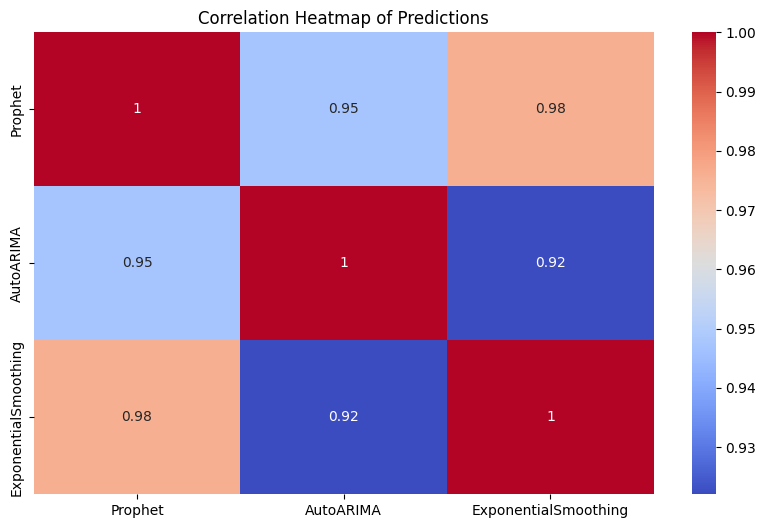

In [75]:
import seaborn as sns

# Prepare data for heatmap
data_for_heatmap = pd.DataFrame({
    'Prophet': y_pred_1,
    'AutoARIMA': y_pred_2,
    'ExponentialSmoothing': y_pred_3
})


# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_for_heatmap.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Predictions')
plt.show()


In [2]:
import requests as re
import json
import pandas as pd

r = re.get('http://127.0.0.1:8000/data/delhi')

# Step 1: Decode the bytes into a string
string_data = r.content.decode('utf-8')

# Step 2: Parse the string into a dictionary
dict_data = json.loads(string_data)

d1 = pd.DataFrame(dict_data)

In [6]:
d1.index = pd.to_datetime(d1.index)

In [7]:
d1

,pm2.5,pm10,o3,no2,so2,co
2024-03-12,167.0,122.0,3.0,16.0,4.0,11.0
2024-03-11,164.0,137.0,15.0,14.0,4.0,11.0
2024-03-10,134.0,128.0,13.0,15.0,4.0,11.0
2024-03-09,145.0,106.0,11.0,13.0,3.0,10.0
2024-03-08,165.0,115.0,10.0,14.0,3.0,10.0
...,...,...,...,...,...,...
2018-01-28,313.0,250.0,5.0,12.0,1.0,11.0
2018-01-27,268.0,330.0,6.0,13.0,2.0,13.0
2018-01-26,260.0,182.0,4.0,9.0,1.0,6.0
2018-01-25,274.0,207.0,2.0,17.0,2.0,8.0
